In [36]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
import seaborn as sns 

In [29]:
#Load dataset
df = pd.read_csv('games.csv')

In [30]:
#print head in order to have a quick view
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


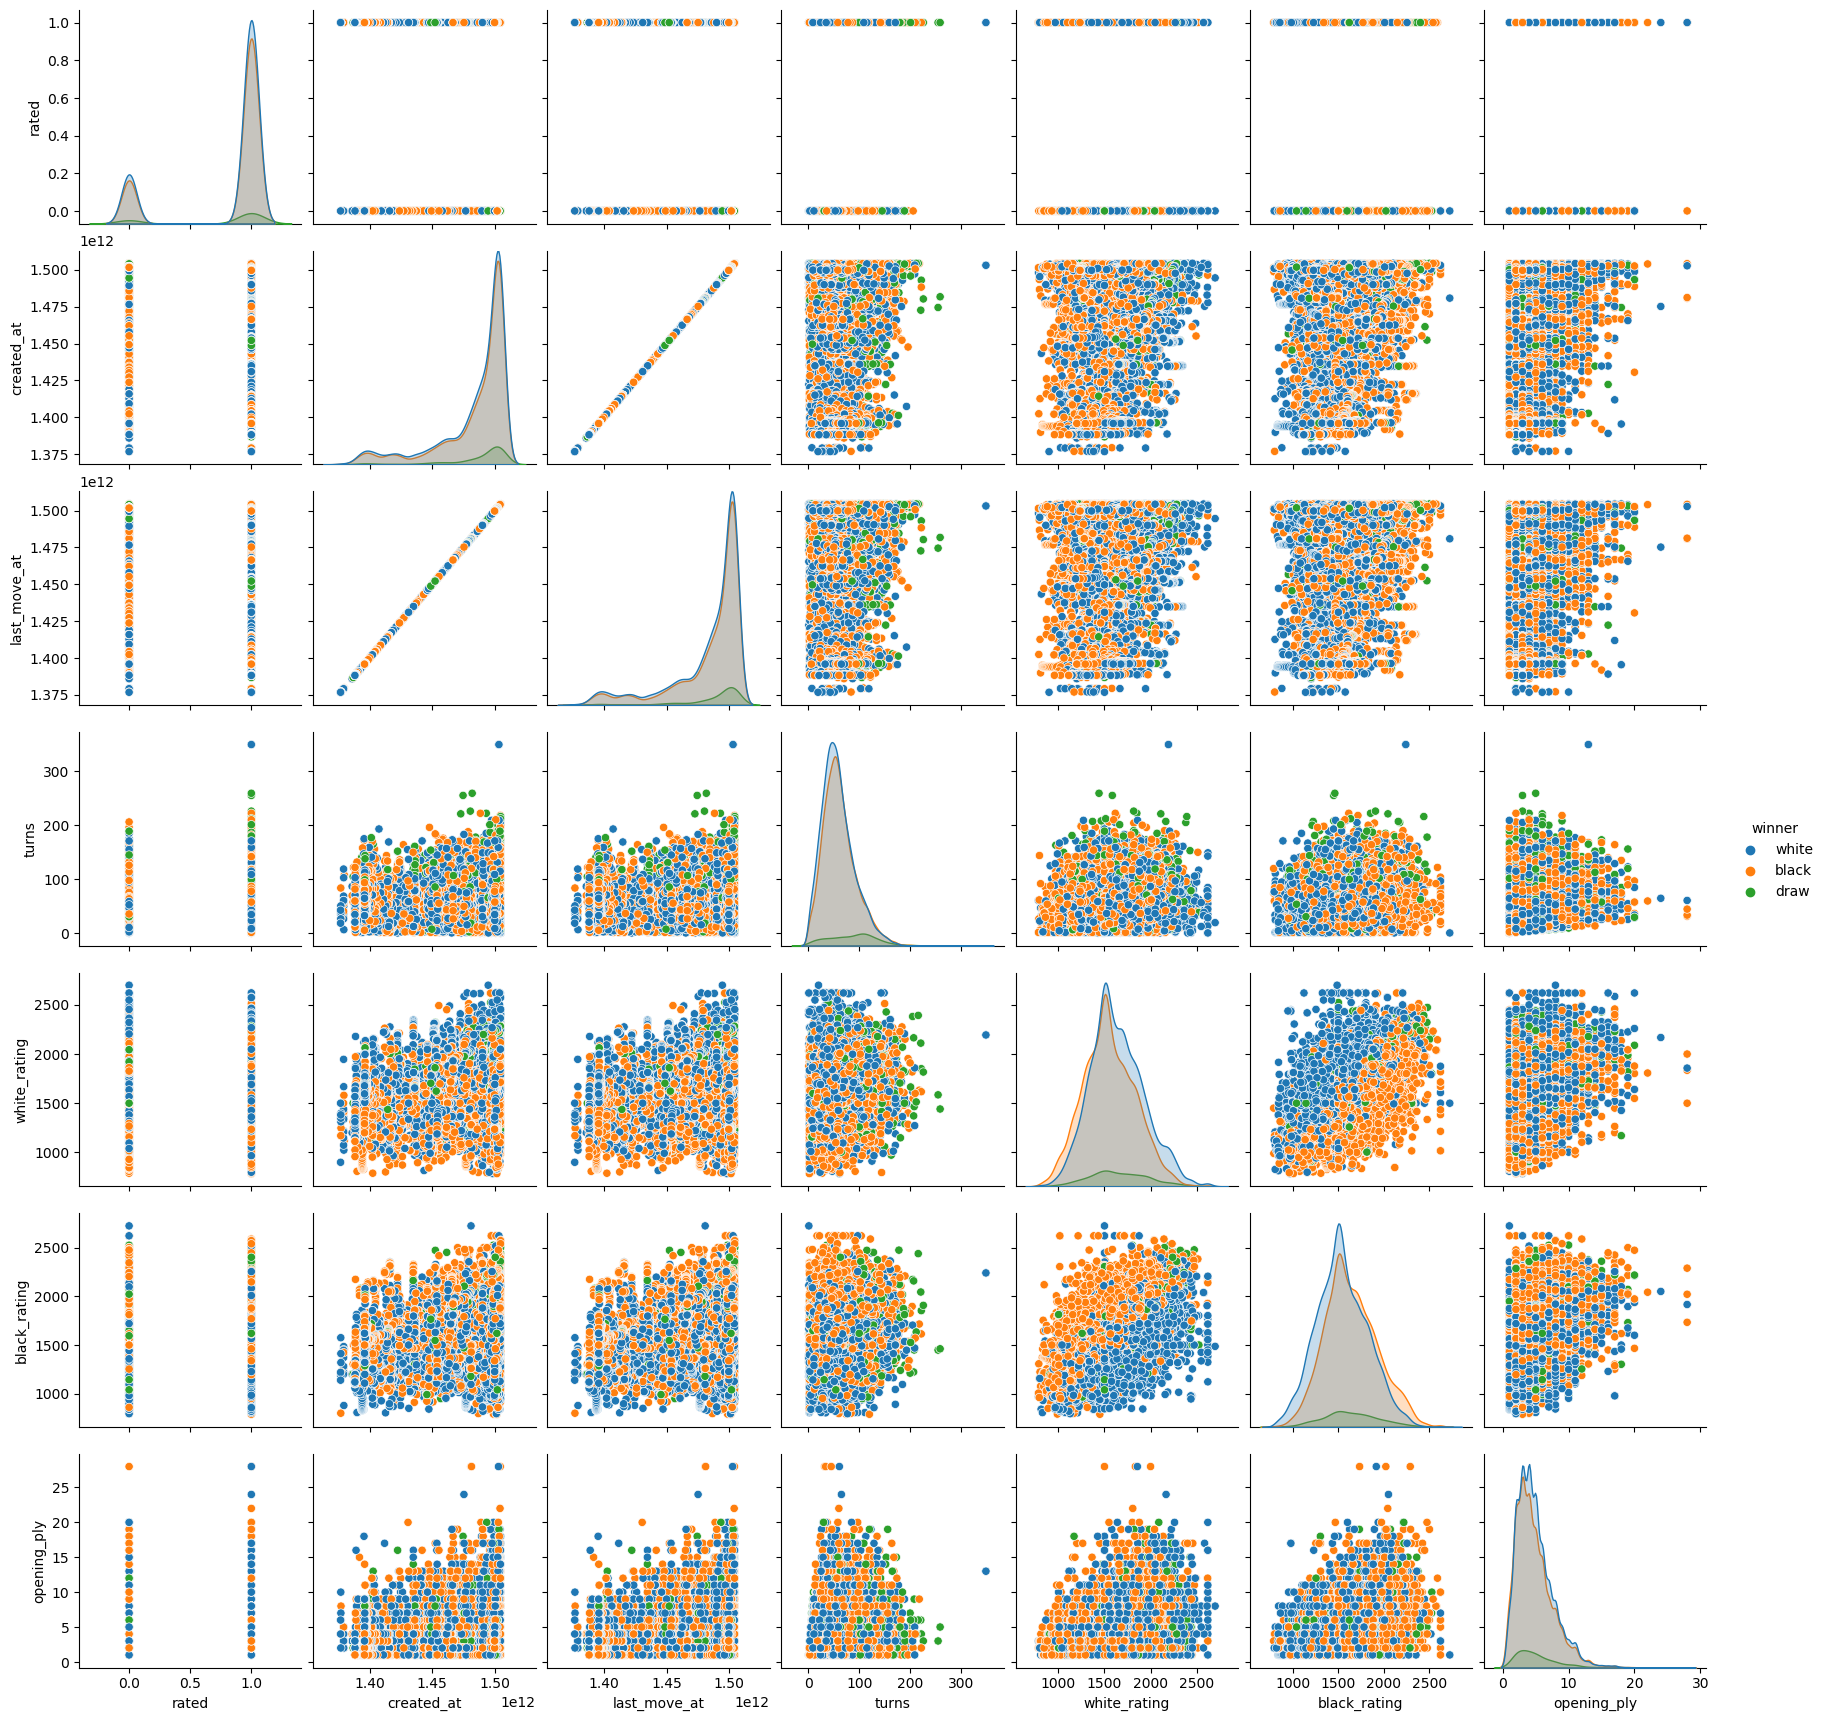

In [108]:
sns.pairplot(df, hue = 'winner')

### Rated

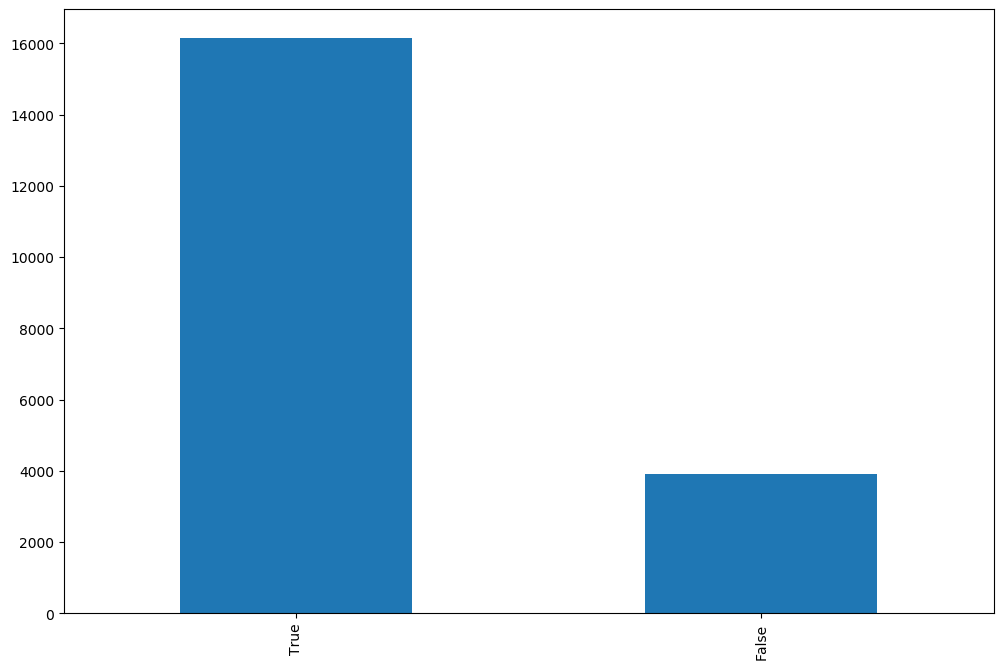

In [37]:
df.rated.value_counts().plot(kind = 'bar')

### Turns

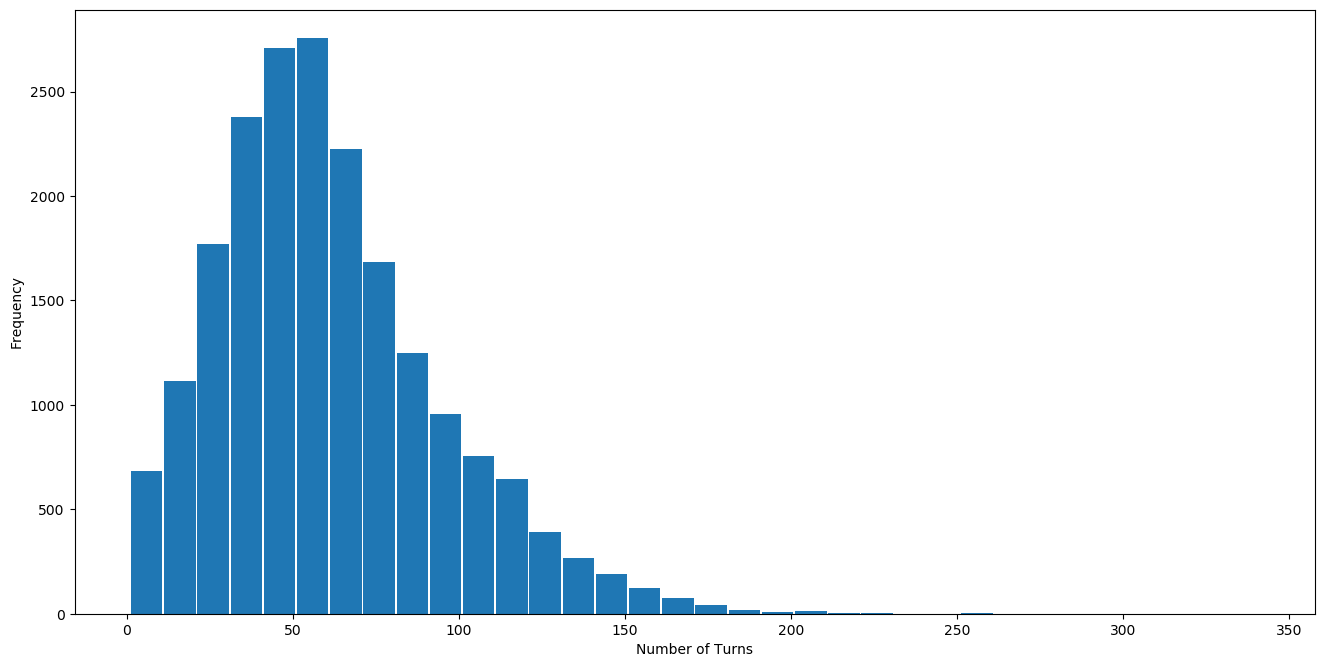

In [38]:
plt.figure(figsize=(16,8))
plt.hist(df['turns'], bins=np.arange(df['turns'].min(), df['turns'].max()+1, 10), rwidth=0.95)
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.show()

# Winners with respect to turns 

In [53]:
df.turns.max()

349

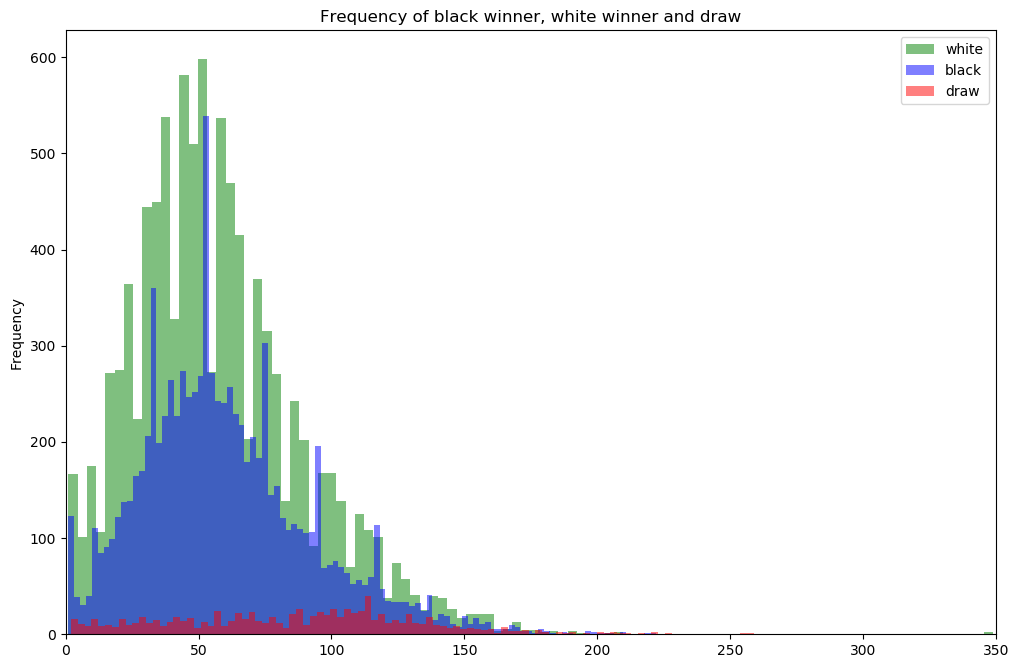

In [55]:
x1 = df.loc[df.winner == 'white', 'turns']
x2 = df.loc[df.winner=='black', 'turns']
x3 = df.loc[df.winner=='draw', 'turns']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='white')
plt.hist(x2, **kwargs, color='b', label='black')
plt.hist(x3, **kwargs, color='r', label='draw')
plt.gca().set(title='Frequency of black winner, white winner and draw', ylabel='Frequency')
plt.xlim(0,350)
plt.legend();

As we can see the more time they took more the chances to win, 

## Victory status with respect to turns

In [40]:
df.victory_status.value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

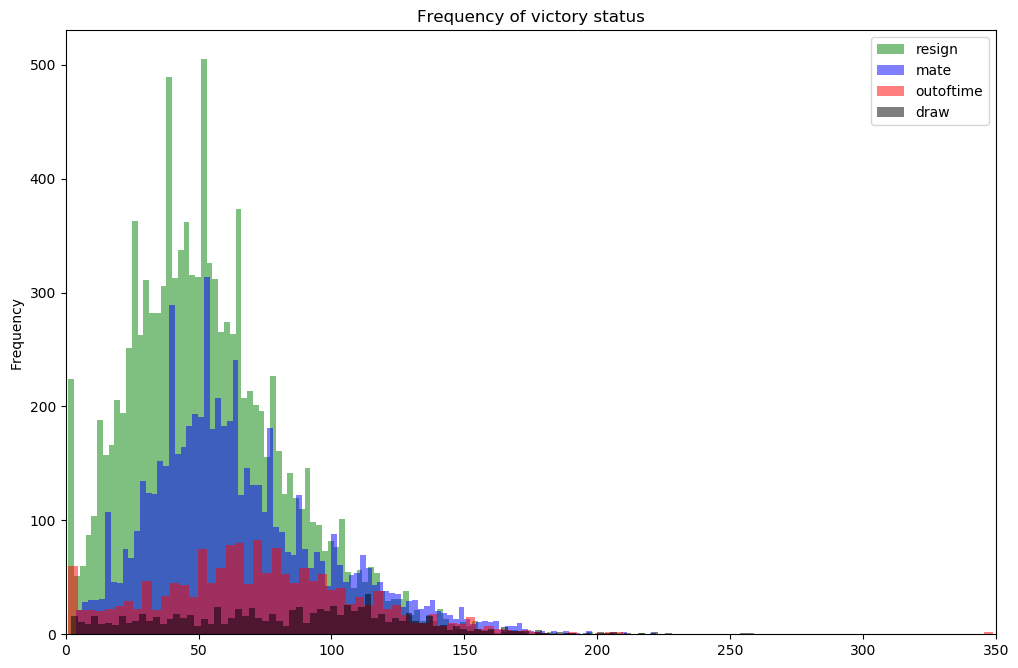

In [54]:
x1 = df.loc[df.victory_status == 'resign', 'turns']
x2 = df.loc[df.victory_status == 'mate', 'turns']
x3 = df.loc[df.victory_status == 'outoftime', 'turns']
x4 = df.loc[df.victory_status == 'draw', 'turns']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='resign')
plt.hist(x2, **kwargs, color='b', label='mate')
plt.hist(x3, **kwargs, color='r', label='outoftime')
plt.hist(x4, **kwargs, color='black', label='draw')
plt.gca().set(title='Frequency of victory status', ylabel='Frequency')
plt.xlim(0,350)
plt.legend();

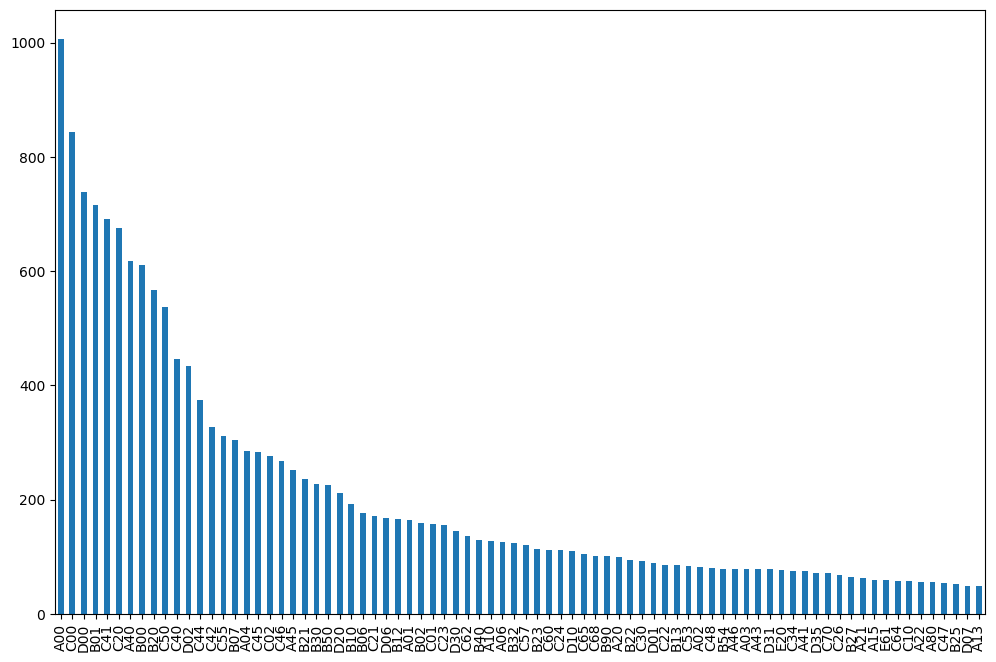

In [82]:
df.opening_eco.value_counts().head(80).plot(kind = 'bar')  #top 80 openig place on chess

In [107]:
df.groupby('winner').opening_eco.apply(lambda x : x.value_counts(normalize = True, ascending = False).nlargest(50).round(2)*100).astype(int)              

winner     
black   A00    6
        C00    4
        D00    4
        C20    4
        B01    4
              ..
white   A20    1
        B40    1
        B23    0
        C34    0
        C30    0
Name: opening_eco, Length: 150, dtype: int64

In [109]:
df_ = pd.crosstab(df.opening_eco, columns = df.winner, normalize = 'index')

In [110]:
df_

winner,black,draw,white
opening_eco,,,
A00,0.566038,0.038729,0.395233
A01,0.487805,0.048780,0.463415
A02,0.548780,0.060976,0.390244
A03,0.487179,0.128205,0.384615
A04,0.354386,0.098246,0.547368
...,...,...,...
E92,0.200000,0.600000,0.200000
E94,0.500000,0.000000,0.500000
E95,0.000000,0.000000,1.000000


In [126]:
df.moves

0        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20053    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20054    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20055    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20056    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20057    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 20058, dtype: object

In [150]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4d5,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4Nc6,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4e5,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4d5,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4e5,C41,Philidor Defense,5
